In [1]:
### importing required dependencies

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import spacy

In [3]:
!pip install -U spacy-lookups-data

In [4]:
### reading the data, encoder should be there 
# (encoder can be specified based on windows or machine as this heavy text file is saved in different format)

In [5]:
data=pd.read_csv('C:/Users/Tejaswini/Documents/POCS/twitter16M.csv',encoding='latin1',names=['Sentiment','id','Day_mon_time','Flag','Username','Tweets'])
data.head()

,Sentiment,id,Day_mon_time,Flag,Username,Tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Sentiment     1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   Day_mon_time  1600000 non-null  object
 3   Flag          1600000 non-null  object
 4   Username      1600000 non-null  object
 5   Tweets        1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
### it gives some statiscal analysis on numerical data only
data.describe()

,Sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [8]:
## check for NaN values
data.isnull().sum()

Sentiment       0
id              0
Day_mon_time    0
Flag            0
Username        0
Tweets          0
dtype: int64

In [9]:
## getting the column names in pandas
data.columns

Index(['Sentiment', 'id', 'Day_mon_time', 'Flag', 'Username', 'Tweets'], dtype='object')

In [10]:
print('Unique values of Sentiment : ', data.Sentiment.unique(), ',Number of unique values:',data.Sentiment.nunique())
print('\nUnique values of Day_mon_time : ',data.Day_mon_time.unique(), ',Number of unique values:',data.Day_mon_time.nunique())
print('\nUnique values of Flag : ',data.Flag.unique(), ',Number of unique values:',data.Flag.nunique())
print('\nUnique values of Username : ',data.Username.unique(), ',Number of unique values:',data.Username.nunique())
print('\nUnique values of Tweets : ',data.Tweets.unique(), ',Number of unique values:',data.Tweets.nunique())

Unique values of Sentiment :  [0 4] ,Number of unique values: 2

Unique values of Day_mon_time :  ['Mon Apr 06 22:19:45 PDT 2009' 'Mon Apr 06 22:19:49 PDT 2009'
 'Mon Apr 06 22:19:53 PDT 2009' ... 'Tue Jun 16 08:38:58 PDT 2009'
 'Tue Jun 16 08:39:00 PDT 2009' 'Tue Jun 16 08:40:50 PDT 2009'] ,Number of unique values: 774363

Unique values of Flag :  ['NO_QUERY'] ,Number of unique values: 1

Unique values of Username :  ['_TheSpecialOne_' 'scotthamilton' 'mattycus' ... 'EvolveTom'
 'AmandaMarie1028' 'bpbabe'] ,Number of unique values: 659775

Unique values of Tweets :  ["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'
 ... 'Are you ready for your MoJo Makeover? Ask me for details '
 'Happy 38th Birthday to my boo of

In [11]:
## target values count
data['Sentiment'].value_counts()

0    800000
4    800000
Name: Sentiment, dtype: int64

In [12]:
data=data.copy()
data.loc[0]

Sentiment                                                       0
id                                                     1467810369
Day_mon_time                         Mon Apr 06 22:19:45 PDT 2009
Flag                                                     NO_QUERY
Username                                          _TheSpecialOne_
Tweets          @switchfoot http://twitpic.com/2y1zl - Awww, t...
Name: 0, dtype: object

In [13]:
df=data[['Sentiment','Tweets']]
df.head()

,Sentiment,Tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [14]:
df.shape

(1600000, 2)

In [15]:
## Checking the whether data as duplicated values in dataset
df.duplicated().any()

True

In [16]:
## Extracting the particular duplicated rows

duplicateRows = df[df.duplicated(['Tweets'])]
duplicateRows

,Sentiment,Tweets
1940,0,and so the editing of 3000 wedding shots begins
2149,0,"im lonely keep me company! 22 female, california"
3743,0,I'm not liking that new iTunes Pricing at all....
3746,0,"cant eat, drink or breath properly thanks to t..."
4163,0,has a cold
...,...,...
1599501,4,getting used to twitter
1599531,4,@KhloeKardashian Definitely my Mom. And Angeli...
1599678,4,goodmorning
1599768,4,Good morning everyone.


In [17]:
## importing stopwords
from spacy.lang.en.stop_words import STOP_WORDS

In [18]:
### encoded the target values
tweets_map={0:'Negative',4:'Positive'}

# Text Analysis

### Word Counts

In [19]:
df['tweets_word_count']=df['Tweets'].apply(lambda x:len(str(x).split()))
df['tweets_word_count']

C:\Users\Tejaswini\AppData\Local\Temp\ipykernel_15228\3493696140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweets_word_count']=df['Tweets'].apply(lambda x:len(str(x).split()))


0          19
1          21
2          18
3          10
4          21
           ..
1599995    11
1599996    11
1599997    11
1599998    12
1599999     5
Name: tweets_word_count, Length: 1600000, dtype: int64

In [20]:
df.head()

,Sentiment,Tweets,tweets_word_count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,0,is upset that he can't update his Facebook by ...,21
2,0,@Kenichan I dived many times for the ball. Man...,18
3,0,my whole body feels itchy and like its on fire,10
4,0,"@nationwideclass no, it's not behaving at all....",21


## Character Count

In [21]:
df['tweets_char_count']=df['Tweets'].apply(lambda x:len(str(x)))
df.head()

C:\Users\Tejaswini\AppData\Local\Temp\ipykernel_15228\1512836058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweets_char_count']=df['Tweets'].apply(lambda x:len(str(x)))


,Sentiment,Tweets,tweets_word_count,tweets_char_count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,115
1,0,is upset that he can't update his Facebook by ...,21,111
2,0,@Kenichan I dived many times for the ball. Man...,18,89
3,0,my whole body feels itchy and like its on fire,10,47
4,0,"@nationwideclass no, it's not behaving at all....",21,111


## Average length of words

In [22]:
def get_avg_len_words(x):
    words = x.split()
    average = sum(len(word) for word in words) / len(words)
    return average

In [23]:
df['avg_word_len']=df['Tweets'].apply(lambda x:get_avg_len_words(x))
df.head()

C:\Users\Tejaswini\AppData\Local\Temp\ipykernel_15228\592420305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_word_len']=df['Tweets'].apply(lambda x:get_avg_len_words(x))


,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,115,5.052632
1,0,is upset that he can't update his Facebook by ...,21,111,4.285714
2,0,@Kenichan I dived many times for the ball. Man...,18,89,3.944444
3,0,my whole body feels itchy and like its on fire,10,47,3.700000
4,0,"@nationwideclass no, it's not behaving at all....",21,111,4.285714


## Stop words count

In [24]:
print(STOP_WORDS)

{'using', 'something', 'give', 'therein', 'be', 'call', 'no', 'such', 'well', 'throughout', 'were', 'those', 'go', 'afterwards', 'an', 'out', 'you', 'been', 'will', 'must', 'after', 'beyond', 'through', 'a', 'seeming', 'very', 'forty', 'once', 'by', 'hereupon', 'though', 'top', 'twelve', 'first', '‘ve', 'indeed', 'keep', 'unless', 'someone', 'third', 'we', 'along', 'only', 'wherein', 'few', 'least', 'she', 'being', 'three', 'whoever', 'may', 'whereby', 'me', 'one', 'hereby', 'here', "'d", "'ve", 'enough', 'whither', 'others', "n't", 'these', 'thru', 'put', 'anyhow', 'make', 'all', 'seem', 'that', 'mine', 'own', 'anyone', 'its', 'where', 'ours', 'from', 'him', 'can', 'who', 'off', 'yourself', 'beside', 'nobody', 'noone', 'ever', '‘s', 'however', 'has', 'towards', 'our', 'moreover', 'take', 'front', 'have', 'himself', 'below', 'in', 'see', 'move', 'neither', 'everyone', 'please', 'whereupon', 'whereas', 'none', 'themselves', 'most', 'or', 'her', 'as', 'this', 'whole', 'another', 'whereaf

In [25]:
df['stopwords_len']=df['Tweets'].apply(lambda x:len([s for s in x.split() if s in STOP_WORDS]))
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,115,5.052632,4
1,0,is upset that he can't update his Facebook by ...,21,111,4.285714,9
2,0,@Kenichan I dived many times for the ball. Man...,18,89,3.944444,7
3,0,my whole body feels itchy and like its on fire,10,47,3.700000,5
4,0,"@nationwideclass no, it's not behaving at all....",21,111,4.285714,10


## Count hashtag and @mention

In [26]:
df['hashtag_count']=df['Tweets'].apply(lambda x:len([h for h in x.split() if h.startswith('#')]))
df['mention_count']=df['Tweets'].apply(lambda x:len([h for h in x.split() if h.startswith('@')]))

In [27]:
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,115,5.052632,4,0,1
1,0,is upset that he can't update his Facebook by ...,21,111,4.285714,9,0,0
2,0,@Kenichan I dived many times for the ball. Man...,18,89,3.944444,7,0,1
3,0,my whole body feels itchy and like its on fire,10,47,3.700000,5,0,0
4,0,"@nationwideclass no, it's not behaving at all....",21,111,4.285714,10,0,1


## Checking numerical value in count

In [28]:
df['num_count']=df['Tweets'].apply(lambda x:len([h for h in x.split() if h.isdigit()]))
df.head(10)

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,115,5.052632,4,0,1,0
1,0,is upset that he can't update his Facebook by ...,21,111,4.285714,9,0,0,0
2,0,@Kenichan I dived many times for the ball. Man...,18,89,3.944444,7,0,1,0
3,0,my whole body feels itchy and like its on fire,10,47,3.700000,5,0,0,0
4,0,"@nationwideclass no, it's not behaving at all....",21,111,4.285714,10,0,1,0
5,0,@Kwesidei not the whole crew,5,29,4.800000,3,0,1,0
6,0,Need a hug,3,11,2.666667,1,0,0,0
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,22,99,3.454545,4,0,1,0
8,0,@Tatiana_K nope they didn't have it,6,36,5.000000,3,0,1,0
9,0,@twittera que me muera ?,5,25,4.000000,1,0,1,0


## Upper case word count

In [29]:
df['upper_wordcount']=df['Tweets'].apply(lambda x:len([t for t in x.split() if t.isupper() and len(x)>3]))
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,115,5.052632,4,0,1,0,1
1,0,is upset that he can't update his Facebook by ...,21,111,4.285714,9,0,0,0,0
2,0,@Kenichan I dived many times for the ball. Man...,18,89,3.944444,7,0,1,0,1
3,0,my whole body feels itchy and like its on fire,10,47,3.700000,5,0,0,0,0
4,0,"@nationwideclass no, it's not behaving at all....",21,111,4.285714,10,0,1,0,1


In [30]:
df['Tweets'][2] 

'@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'

# Text Preprocessing and Cleaning 

### Lower Case Conversation

In [31]:
df['Tweets']=df['Tweets'].apply(lambda x:x.lower())
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",19,115,5.052632,4,0,1,0,1
1,0,is upset that he can't update his facebook by ...,21,111,4.285714,9,0,0,0,0
2,0,@kenichan i dived many times for the ball. man...,18,89,3.944444,7,0,1,0,1
3,0,my whole body feels itchy and like its on fire,10,47,3.700000,5,0,0,0,0
4,0,"@nationwideclass no, it's not behaving at all....",21,111,4.285714,10,0,1,0,1


### Contraction to Expansion

Contraction :- Contractions are words or combinations of words that are shortened by dropping letters and replacing 
               them by an apostrophe.
        
Expansion :- Expanding the contaction word       

In [32]:
import sys  
!{sys.executable} -m pip install contractions

In [33]:
import contractions

In [34]:
print(contractions)

<module 'contractions' from 'C:\\Users\\Tejaswini\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\contractions\\__init__.py'>


In [35]:
## function that expands contaction word
def contra_expan(x):
    if type(x) == str:
        expanded_words=[]
        for word in x.split():
            expanded_words.append(contractions.fix(word))
            expanded_text=' '.join(expanded_words)   
        return expanded_text
    else:
        return x

In [36]:
## testing with sentence of function contra_expan
x="I'd be happy"
contra_expan(x)

'I would be happy'

In [37]:
df['Tweets']=df['Tweets'].apply(lambda x:contra_expan(x))
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",19,115,5.052632,4,0,1,0,1
1,0,is upset that he cannot update his facebook by...,21,111,4.285714,9,0,0,0,0
2,0,@kenichan i dived many times for the ball. man...,18,89,3.944444,7,0,1,0,1
3,0,my whole body feels itchy and like its on fire,10,47,3.700000,5,0,0,0,0
4,0,"@nationwideclass no, it is not behaving at all...",21,111,4.285714,10,0,1,0,1


### Remove E-mail in tweets

In [38]:
import re

In [39]:
df['Tweets']=df['Tweets'].apply(lambda x:re.sub(r'([a-zA-Z0-9]+@[a-zA-Z0-9._]+\.[a-zA-Z0-9_-]+)','', x))
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",19,115,5.052632,4,0,1,0,1
1,0,is upset that he cannot update his facebook by...,21,111,4.285714,9,0,0,0,0
2,0,@kenichan i dived many times for the ball. man...,18,89,3.944444,7,0,1,0,1
3,0,my whole body feels itchy and like its on fire,10,47,3.700000,5,0,0,0,0
4,0,"@nationwideclass no, it is not behaving at all...",21,111,4.285714,10,0,1,0,1


### Remove URL  Flag from tweets

In [40]:
df['Tweets']=df['Tweets'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"@switchfoot - awww, that is a bummer. you sho...",19,115,5.052632,4,0,1,0,1
1,0,is upset that he cannot update his facebook by...,21,111,4.285714,9,0,0,0,0
2,0,@kenichan i dived many times for the ball. man...,18,89,3.944444,7,0,1,0,1
3,0,my whole body feels itchy and like its on fire,10,47,3.700000,5,0,0,0,0
4,0,"@nationwideclass no, it is not behaving at all...",21,111,4.285714,10,0,1,0,1


### Remove special chars or punctuation

In [41]:
df['Tweets']=df['Tweets'].apply(lambda x : re.sub(r"[^0-9a-zA-Z:,]+",' ',x))
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"switchfoot awww, that is a bummer you shoulda...",19,115,5.052632,4,0,1,0,1
1,0,is upset that he cannot update his facebook by...,21,111,4.285714,9,0,0,0,0
2,0,kenichan i dived many times for the ball mana...,18,89,3.944444,7,0,1,0,1
3,0,my whole body feels itchy and like its on fire,10,47,3.700000,5,0,0,0,0
4,0,"nationwideclass no, it is not behaving at all...",21,111,4.285714,10,0,1,0,1


### Remove mutiple spaces

In [42]:
 df['Tweets']=df['Tweets'].apply(lambda x:re.sub(r'f^[\+\sa-zA-Z]+',' ',x))
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"switchfoot awww, that is a bummer you shoulda...",19,115,5.052632,4,0,1,0,1
1,0,is upset that he cannot update his facebook by...,21,111,4.285714,9,0,0,0,0
2,0,kenichan i dived many times for the ball mana...,18,89,3.944444,7,0,1,0,1
3,0,my whole body feels itchy and like its on fire,10,47,3.700000,5,0,0,0,0
4,0,"nationwideclass no, it is not behaving at all...",21,111,4.285714,10,0,1,0,1


### Remove HTML tags

In [43]:
!pip install beautifulsoup4

In [44]:
!pip install lxml

In [45]:
from bs4 import BeautifulSoup

In [46]:
## demo of removal of html tags

x='<html><h2>Welcome </h2></html>'
BeautifulSoup(x,'lxml').get_text()

'Welcome '

In [47]:
# df['Tweets']=df['Tweets'].apply(lambda x:BeautifulSoup(x,'lxml').get_text())

### Remove Accented Character


Accent marks (sometimes referred to simply as accents) and accented characters are important elements in both written and 
spoken language, and, by extension, in typography. ... Accent marks (also referred to as diacritics or diacriticals) 
usually appear above a character

There are a number of ways of obtaining accented characters and symbols which are not on the keyboard. 

In [48]:
import unicodedata

def remove_accented(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(text)

In [49]:
df['Tweets']=df['Tweets'].apply(lambda x:remove_accented(x))
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"switchfoot awww, that is a bummer you shoulda...",19,115,5.052632,4,0,1,0,1
1,0,is upset that he cannot update his facebook by...,21,111,4.285714,9,0,0,0,0
2,0,kenichan i dived many times for the ball mana...,18,89,3.944444,7,0,1,0,1
3,0,my whole body feels itchy and like its on fire,10,47,3.700000,5,0,0,0,0
4,0,"nationwideclass no, it is not behaving at all...",21,111,4.285714,10,0,1,0,1


## SpaCy and NLP

In [50]:
import spacy

In [51]:
## to remove stopwords

df['Tweets']=df['Tweets'].apply(lambda x:' '.join([s for s in x.split() if s  not in STOP_WORDS]))
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"switchfoot awww, bummer shoulda got david carr...",19,115,5.052632,4,0,1,0,1
1,0,upset update facebook texting cry result schoo...,21,111,4.285714,9,0,0,0,0
2,0,kenichan dived times ball managed save 50 rest...,18,89,3.944444,7,0,1,0,1
3,0,body feels itchy like fire,10,47,3.700000,5,0,0,0,0
4,0,"nationwideclass no, behaving mad",21,111,4.285714,10,0,1,0,1


### Convert into base or root word

In [52]:
!python -m spacy download en_core_web_sm
nlp=spacy.load('en_core_web_sm')

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-03-07 18:12:28.680768: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-07 18:12:28.680841: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [53]:
nlp = spacy.load("en_core_web_sm")

In [54]:

def base_word(text):
    text_list=[]
    doc = nlp(text)
        
    for token in doc:
        lemma=str(token.lemma_)
        if lemma == '-PRON-' or lemma=='be':
            lemma = token.text
        text_list.append(lemma)
    print(' '.join(text_list))
  

In [55]:
df['Tweets'][2]

'kenichan dived times ball managed save 50 rest bounds'

In [56]:
text='kenichan dived times ball managed save 50 rest bounds'
base_word(text)

kenichan dive time ball manage save 50 rest bound


In [57]:
## By using these code we can convert tweets word into base word 

#df['Tweets']=df['Tweets'].apply(lambda x:base_word(x))
#df.head()

### Common word removal

In [58]:
df.head()['Tweets']

0    switchfoot awww, bummer shoulda got david carr...
1    upset update facebook texting cry result schoo...
2    kenichan dived times ball managed save 50 rest...
3                           body feels itchy like fire
4                     nationwideclass no, behaving mad
Name: Tweets, dtype: object

In [59]:
text=' '.join(df['Tweets'])

In [60]:
text=text.split()

In [61]:
freq_count=pd.Series(text).value_counts()
freq_count

good             89131
going            88586
day              83450
like             77703
quot             72090
                 ...  
twipo                1
pellmellers          1
heybroccoli          1
myrockshow           1
speakinguph4h        1
Length: 651512, dtype: int64

In [62]:
## top 20 frequently occuring token
f20=freq_count.head(20)
f20

good     89131
going    88586
day      83450
like     77703
quot     72090
got      70497
love     66457
s        62924
today    62851
work     62004
want     58664
lol      56456
time     56074
know     51007
amp      48706
new      42310
2        41470
think    41082
night    40979
home     38561
dtype: int64

In [63]:
df['Tweets']=df['Tweets'].apply(lambda x:' '.join([t for t in x.split() if t not in f20]))
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"switchfoot awww, bummer shoulda david carr d",19,115,5.052632,4,0,1,0,1
1,0,upset update facebook texting cry result schoo...,21,111,4.285714,9,0,0,0,0
2,0,kenichan dived times ball managed save 50 rest...,18,89,3.944444,7,0,1,0,1
3,0,body feels itchy fire,10,47,3.700000,5,0,0,0,0
4,0,"nationwideclass no, behaving mad",21,111,4.285714,10,0,1,0,1


### Rare words removal

In [64]:
rare20=freq_count.tail(20)
rare20

7,7                 1
shenanagans         1
teefany             1
keeeee              1
restlesssss         1
moderntouchdjs      1
chicargo            1
kross,              1
spriest             1
gezz,               1
jennpossible        1
omgitssob           1
mackerals           1
kieferireland       1
kmgnbwvngmpjcdvd    1
twipo               1
pellmellers         1
heybroccoli         1
myrockshow          1
speakinguph4h       1
dtype: int64

In [65]:
df['Tweets']=df['Tweets'].apply(lambda x:' '.join([t for t in x.split() if t not in rare20]))
df.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"switchfoot awww, bummer shoulda david carr d",19,115,5.052632,4,0,1,0,1
1,0,upset update facebook texting cry result schoo...,21,111,4.285714,9,0,0,0,0
2,0,kenichan dived times ball managed save 50 rest...,18,89,3.944444,7,0,1,0,1
3,0,body feels itchy fire,10,47,3.700000,5,0,0,0,0
4,0,"nationwideclass no, behaving mad",21,111,4.285714,10,0,1,0,1


## Word Cloud Visualization


Word cloud is another unorthodox visualization method that can be very useful and practical to highlight projects, express 
ideas,  summarize documents and visualize text and create text art in general.

Word cloud is another term that’s often used interchangeably with text cloud as well as tag cloud.

In [66]:
!pip install wordcloud 

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
x=' '.join(text[:30000])
len(text)

11057455

In [69]:
x

'switchfoot awww, bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass no, behaving mad kwesidei crew need hug loltrish hey long time yes rains bit ,only bit lol , fine thanks , tatiana k nope twittera que muera spring break plain city snowing pierced ears caregiving bear watch thought ua loss embarrassing octolinz16 counts, idk talk anymore smarrison first, gun though, zac snyder s doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiere hollis death scene hurt severely watch film wry directors cut file taxes lettya ahh wanted rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day friend called me, asked meet mid valley today time sigh angry barista baked cake ated week going hoped blagh class 8 tomorrow hate wake people going cry sleep watching marley sad miss lilly ooooh lol leslie ok leslie mad meh

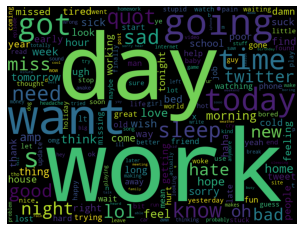

In [70]:
wc = WordCloud(width=800,height=600).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Spelling correction

In [71]:
!pip install -U textblob

In [72]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Tejaswini\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tejaswini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tejaswini\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tejaswini\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Tejaswini\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Tejaswini\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_review

In [73]:
from textblob import TextBlob 

In [74]:
x='What we love in our books are the depths of many marvlous moments seen all at once…they produce an imige of lify that is beautiful and surprising and deep'

In [75]:
x=TextBlob(x).correct
x

<bound method BaseBlob.correct of TextBlob("What we love in our books are the depths of many marvlous moments seen all at once…they produce an imige of lify that is beautiful and surprising and deep")>

In [76]:
# tweets=df['Tweets'].apply(lambda x:TextBlob(x).correct)

In [77]:
### spell corrector for whole dataset of tweets

#def get_tweet_sentiment(tweets):
 # print(tweets)
  #return tweets

#df = pd.DataFrame([text])
#df.columns = ['tweet_content']
#print(df.head())
#df['tweet_content'].apply(lambda x: get_tweet_sentiment(' '.join(x)))


### Tokenization

In [78]:
X='For a machine to be autonomous, a key tenet is to be able to communicate via one of the natural languages known to humans. In the wide world of Artificial Intelligence, one field deals with enabling machines to interact using these languages: Natural Language Processing (NLP).'

In [79]:
## using textblob to get token
TextBlob(X).words

WordList(['For', 'a', 'machine', 'to', 'be', 'autonomous', 'a', 'key', 'tenet', 'is', 'to', 'be', 'able', 'to', 'communicate', 'via', 'one', 'of', 'the', 'natural', 'languages', 'known', 'to', 'humans', 'In', 'the', 'wide', 'world', 'of', 'Artificial', 'Intelligence', 'one', 'field', 'deals', 'with', 'enabling', 'machines', 'to', 'interact', 'using', 'these', 'languages', 'Natural', 'Language', 'Processing', 'NLP'])

In [80]:
## using SpaCy to get token
doc=nlp(X)
for tokens in doc:
    print(tokens)

For
a
machine
to
be
autonomous
,
a
key
tenet
is
to
be
able
to
communicate
via
one
of
the
natural
languages
known
to
humans
.
In
the
wide
world
of
Artificial
Intelligence
,
one
field
deals
with
enabling
machines
to
interact
using
these
languages
:
Natural
Language
Processing
(
NLP
)
.


## Lemmatization

In [81]:
x='runs run running run'

In [82]:
from textblob import Word

In [83]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tejaswini\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [84]:
## using textblob
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
run


In [85]:
## using SpaCy
doc =nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


## Detect Entities using NER(Name Entity Recognition) of SpaCy

In [86]:
x='For a machine to be autonomous, a key tenet is to be able to communicate via one of the natural languages known to humans. In the wide world of Artificial Intelligence, one field deals with enabling machines to interact using these languages: Natural Language Processing (NLP).'

In [87]:
doc=nlp(x)
for ent in doc.ents:
    print(ent.text+'-'+ent.label_+'-'+str(spacy.explain(ent.label)))

one-CARDINAL-None
Artificial Intelligence-ORG-None
one-CARDINAL-None


In [88]:
## for visualze the NER
from spacy import displacy

In [89]:
displacy.render(doc,style='ent')

### Detecting Nouns

In [90]:
x

'For a machine to be autonomous, a key tenet is to be able to communicate via one of the natural languages known to humans. In the wide world of Artificial Intelligence, one field deals with enabling machines to interact using these languages: Natural Language Processing (NLP).'

In [91]:
for noun in doc.noun_chunks:
    print(noun)

a machine
a key tenet
the natural languages
humans
the wide world
Artificial Intelligence
one field
enabling machines
these languages
Natural Language Processing
NLP


### Use inbuilt sentiment calssifier

In [92]:
from textblob.sentiments import NaiveBayesAnalyzer

In [93]:
x='we all stands together to fight with corona virus.we will win together'

In [94]:
tb=TextBlob(x,analyzer=NaiveBayesAnalyzer())

In [95]:
## by using inbuilt function,we check the sentiment of resptive sentences
tb.sentiment

Sentiment(classification='pos', p_pos=0.902091274873533, p_neg=0.0979087251264664)

## Advanced Text Pre-processing

### N-grams

In [96]:
x='Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans. Leading AI textbooks define the field as the study of "intelligent agents": any system that perceives its environment and takes actions that maximize its chance of achieving its goals.'

In [97]:
## Return a list of n-grams (tuples of n successive words) for this blob.

tb=TextBlob(x)
tb.ngrams(6)

[WordList(['Artificial', 'intelligence', 'AI', 'is', 'intelligence', 'demonstrated']),
 WordList(['intelligence', 'AI', 'is', 'intelligence', 'demonstrated', 'by']),
 WordList(['AI', 'is', 'intelligence', 'demonstrated', 'by', 'machines']),
 WordList(['is', 'intelligence', 'demonstrated', 'by', 'machines', 'as']),
 WordList(['intelligence', 'demonstrated', 'by', 'machines', 'as', 'opposed']),
 WordList(['demonstrated', 'by', 'machines', 'as', 'opposed', 'to']),
 WordList(['by', 'machines', 'as', 'opposed', 'to', 'natural']),
 WordList(['machines', 'as', 'opposed', 'to', 'natural', 'intelligence']),
 WordList(['as', 'opposed', 'to', 'natural', 'intelligence', 'displayed']),
 WordList(['opposed', 'to', 'natural', 'intelligence', 'displayed', 'by']),
 WordList(['to', 'natural', 'intelligence', 'displayed', 'by', 'animals']),
 WordList(['natural', 'intelligence', 'displayed', 'by', 'animals', 'including']),
 WordList(['intelligence', 'displayed', 'by', 'animals', 'including', 'humans']),
 

### Bag of words


Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data


A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [98]:
x=['Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans,Leading AI textbooks define the field as the study of "intelligent agents": any system that perceives its environment and takes actions that maximize its chance of achieving its goals.']

In [99]:
!pip install -U scikit-learn==0.21.3

  Using cached scikit-learn-0.13.tar.gz (3.5 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Tejaswini\anaconda3\envs\tensorflow\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Tejaswini\\AppData\\Local\\Temp\\pip-install-_izlz98s\\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\\setup.py'"'"'; __file__='"'"'C:\\Users\\Tejaswini\\AppData\\Local\\Temp\\pip-install-_izlz98s\\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Tejaswini\AppData\Local\Temp\pip-wheel-tr3t0lm6'
       cwd: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\
  Complete output (987 lines):
  Partial import of sklearn during the build process.
  Copyin

      Successfully uninstalled scikit-learn-1.0.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\tejaswini\anaconda3\envs\tensorflow\lib\site-packages\scikit_learn-1.0.2.dist-info\
   from C:\Users\Tejaswini\anaconda3\envs\tensorflow\Lib\site-packages\~cikit_learn-1.0.2.dist-info
  Moving to c:\users\tejaswini\anaconda3\envs\tensorflow\lib\site-packages\sklearn\
   from C:\Users\Tejaswini\anaconda3\envs\tensorflow\Lib\site-packages\~klearn


  RefactoringTool: No changes to C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\test_setup.py
  RefactoringTool: No changes to C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\__check_build\__init__.py
  RefactoringTool: No changes to C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\__check_build\setup.py
  RefactoringTool: No changes to C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\cluster\__init__.py
  RefactoringTool: No changes to C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\cluster\_feature_agglomeration.py
  RefactoringTool: Refactored C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-le

In [100]:
from sklearn.feature_extraction.text import CountVectorizer


  RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\externals\joblib\format_stack.py
  RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\externals\joblib\func_inspect.py
  RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\externals\joblib\hashing.py
  RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\externals\joblib\logger.py
  RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\externals\joblib\memory.py
  RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\s

  running build
  running config_cc
  INFO: unifing config_cc, config, build_clib, build_ext, build commands --compiler options
  running config_fc
  INFO: unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
  running build_src
  INFO: build_src
  INFO: building library "libsvm-skl" sources
  INFO: building library "blas" sources
  INFO: building library "cblas" sources
  INFO: building extension "sklearn.__check_build._check_build" sources
  INFO: building extension "sklearn.svm.libsvm" sources
  INFO: building extension "sklearn.svm.liblinear" sources
  INFO: building extension "sklearn.svm.libsvm_sparse" sources
  INFO: building extension "sklearn.datasets._svmlight_format" sources
  INFO: building extension "sklearn.feature_extraction._hashing" sources
  INFO: building extension "sklearn.cluster._hierarchical" sources
  INFO: building extension "sklearn.cluster._k_means" sources
  INFO: building extension "sklearn.ensemble._gradient_boosting" source

In [101]:
cv=CountVectorizer(ngram_range=(1,1))
text_counts=cv.fit_transform(x)

  copying sklearn\datasets\california_housing.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\lfw.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\mlcomp.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\mldata.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\olivetti_faces.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\samples_generator.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\setup.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\species_distributions.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\svmlight_format.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\twenty_newsgroups.py -> build\lib.win-amd64-3.8\sklearn\datasets
  copying sklearn\datasets\__init__.py -> build\lib.win-amd64-3.8\sklearn\datasets
  creating build\lib.win-amd64-3.8\sklearn\da

  copying sklearn\externals\joblib\numpy_pickle.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\parallel.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\testing.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\_compat.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  copying sklearn\externals\joblib\__init__.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib
  creating build\lib.win-amd64-3.8\sklearn\externals\joblib\test
  copying sklearn\externals\joblib\test\common.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib/test
  copying sklearn\externals\joblib\test\test_disk.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib/test
  copying sklearn\externals\joblib\test\test_format_stack.py -> build\lib.win-amd64-3.8\sklearn\externals\joblib/test
  copying sklearn\externals\joblib\test\test_func_inspect.py -> build\lib.win-amd64-3.8\sklearn\externa

In [102]:
text_counts

<1x37 sparse matrix of type '<class 'numpy.int64'>'
	with 37 stored elements in Compressed Sparse Row format>

In [103]:
text_counts.toarray()

array([[1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
        3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1]], dtype=int64)

In [104]:
## to get unique feature names
cv.get_feature_names()

C:\Users\Tejaswini\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['achieving',
 'actions',
 'agents',
 'ai',
 'and',
 'animals',
 'any',
 'artificial',
 'as',
 'by',
 'chance',
 'define',
 'demonstrated',
 'displayed',
 'environment',
 'field',
 'goals',
 'humans',
 'including',
 'intelligence',
 'intelligent',
 'is',
 'its',
 'leading',
 'machines',
 'maximize',
 'natural',
 'of',
 'opposed',
 'perceives',
 'study',
 'system',
 'takes',
 'textbooks',
 'that',
 'the',
 'to']

In [105]:
!pip install pandas


    Copying source tree into build/py3k for 2to3 transformation...
    Converting to Python3 via 2to3...
    RefactoringTool: Skipping optional fixer: buffer
    RefactoringTool: Skipping optional fixer: idioms
    RefactoringTool: Skipping optional fixer: set_literal
    RefactoringTool: Skipping optional fixer: ws_comma
    RefactoringTool: Refactored C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\__init__.py
    RefactoringTool: No changes to C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\_build_utils.py
    RefactoringTool: Refactored C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\base.py
    RefactoringTool: Refactored C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\cross_valida

    RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\utils\sparsetools\csgraph.py
    RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\utils\sparsetools\setup.py
    RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\utils\tests\test_extmath.py
    RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\utils\tests\test_fixes.py
    RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sklearn\utils\tests\test_graph.py
    RefactoringTool: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-_izlz98s\scikit-learn_52c76b8ddd0b4ac1b9c797f8807d7eff\build\py3k\sk

    INFO: building extension "sklearn.utils.random" sources
    INFO: building data_files sources
    INFO: build_src: building npy-pkg config files
    running build_py
    creating build
    creating build\lib.win-amd64-3.8
    creating build\lib.win-amd64-3.8\sklearn
    copying sklearn\base.py -> build\lib.win-amd64-3.8\sklearn
    copying sklearn\cross_validation.py -> build\lib.win-amd64-3.8\sklearn
    copying sklearn\dummy.py -> build\lib.win-amd64-3.8\sklearn
    copying sklearn\grid_search.py -> build\lib.win-amd64-3.8\sklearn
    copying sklearn\hmm.py -> build\lib.win-amd64-3.8\sklearn
    copying sklearn\isotonic.py -> build\lib.win-amd64-3.8\sklearn
    copying sklearn\kernel_approximation.py -> build\lib.win-amd64-3.8\sklearn
    copying sklearn\lda.py -> build\lib.win-amd64-3.8\sklearn
    copying sklearn\multiclass.py -> build\lib.win-amd64-3.8\sklearn
    copying sklearn\naive_bayes.py -> build\lib.win-amd64-3.8\sklearn
    copying sklearn\pipeline.py -> build\lib.win

In [106]:
bow=pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())

In [107]:
bow

,achieving,actions,agents,ai,and,animals,any,artificial,as,by,...,of,opposed,perceives,study,system,takes,textbooks,that,the,to
0,1,1,1,2,1,1,1,1,2,2,...,2,1,1,1,1,1,1,2,2,1


### Term frequency

Term frequency is simply the ratio of the count of a word present in a sentences,to the length of the sentences

In [108]:
x

['Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans,Leading AI textbooks define the field as the study of "intelligent agents": any system that perceives its environment and takes actions that maximize its chance of achieving its goals.']

In [109]:
x=['Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans','Leading AI textbooks define the field as the study of "intelligent agents": any system that perceives its environment and takes actions that maximize its chance of achieving its goals.']

In [110]:
x

['Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans',
 'Leading AI textbooks define the field as the study of "intelligent agents": any system that perceives its environment and takes actions that maximize its chance of achieving its goals.']

In [111]:
cv.get_feature_names()

C:\Users\Tejaswini\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['achieving',
 'actions',
 'agents',
 'ai',
 'and',
 'animals',
 'any',
 'artificial',
 'as',
 'by',
 'chance',
 'define',
 'demonstrated',
 'displayed',
 'environment',
 'field',
 'goals',
 'humans',
 'including',
 'intelligence',
 'intelligent',
 'is',
 'its',
 'leading',
 'machines',
 'maximize',
 'natural',
 'of',
 'opposed',
 'perceives',
 'study',
 'system',
 'takes',
 'textbooks',
 'that',
 'the',
 'to']

In [112]:
text_counts=cv.fit_transform(x)
text_counts

<2x37 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [113]:
text_counts.toarray()

array([[0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 3, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        3, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0]], dtype=int64)

In [114]:
bow1=pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
bow1

,achieving,actions,agents,ai,and,animals,any,artificial,as,by,...,of,opposed,perceives,study,system,takes,textbooks,that,the,to
0,0,0,0,1,0,1,0,1,1,2,...,0,1,0,0,0,0,0,0,0,1
1,1,1,1,1,1,0,1,0,1,0,...,2,0,1,1,1,1,1,2,2,0


In [115]:
bow1.shape

(2, 37)

In [116]:
tf=bow1.copy()

In [117]:
for index,row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index,col]=tf.loc[index,col]/sum(row[1].values)

In [118]:
tf

,achieving,actions,agents,ai,and,animals,any,artificial,as,by,...,of,opposed,perceives,study,system,takes,textbooks,that,the,to
0,0.000000,0.000000,0.000000,0.055556,0.000000,0.055556,0.000000,0.055556,0.055556,0.111111,...,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556
1,0.034483,0.034483,0.034483,0.034483,0.034483,0.000000,0.034483,0.000000,0.034483,0.000000,...,0.068966,0.000000,0.034483,0.034483,0.034483,0.034483,0.034483,0.068966,0.068966,0.000000


### Inverse Document Frequency

The term frequency of a word in a document. There are several ways of calculating this frequency, with the simplest being a raw count of instances a word appears in a document. Then, there are ways to adjust the frequency, by length of a document, or by the raw frequency of the most frequent word in a document.


The inverse document frequency of the word across a set of documents. This means, how common or rare a word is in the entire document set. The closer it is to 0, the more common a word is. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.

idf=log((1+N)/(n+1))+1 used in sklearn when smooth-idf=True

where,N is the total number of rows and n is the number of rows in which the word was present

In [119]:
x_df=pd.DataFrame(x,columns=['words'])
x_df

,words
0,Artificial intelligence (AI) is intelligence d...
1,Leading AI textbooks define the field as the s...


In [120]:
bow1

,achieving,actions,agents,ai,and,animals,any,artificial,as,by,...,of,opposed,perceives,study,system,takes,textbooks,that,the,to
0,0,0,0,1,0,1,0,1,1,2,...,0,1,0,0,0,0,0,0,0,1
1,1,1,1,1,1,0,1,0,1,0,...,2,0,1,1,1,1,1,2,2,0


In [121]:
N=bow1.shape[0]
N

2

In [122]:
bb=bow1.astype('bool')
bb

,achieving,actions,agents,ai,and,animals,any,artificial,as,by,...,of,opposed,perceives,study,system,takes,textbooks,that,the,to
0,False,False,False,True,False,True,False,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,True,True,True,True,True,False,True,False,True,False,...,True,False,True,True,True,True,True,True,True,False


In [123]:
cols=bb.columns
cols

Index(['achieving', 'actions', 'agents', 'ai', 'and', 'animals', 'any',
       'artificial', 'as', 'by', 'chance', 'define', 'demonstrated',
       'displayed', 'environment', 'field', 'goals', 'humans', 'including',
       'intelligence', 'intelligent', 'is', 'its', 'leading', 'machines',
       'maximize', 'natural', 'of', 'opposed', 'perceives', 'study', 'system',
       'takes', 'textbooks', 'that', 'the', 'to'],
      dtype='object')

In [124]:
non_zero=[]
for col in cols:
    non_zero.append(bb[col].sum())

In [125]:
non_zero

[1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [126]:
idf=[]
for index,col in enumerate(cols):
    idf.append(np.log((N+1)/(non_zero[index]+1))+1)

In [127]:
idf

[1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.0,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.0,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644]

### Term Frequency-Inverse Document Frequency(TFIDF)

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [129]:
tfidf=TfidfVectorizer()
x_tfidf=tfidf.fit_transform(x_df['words'])

In [130]:
x_tfidf.toarray()

array([[0.        , 0.        , 0.        , 0.14226612, 0.        ,
        0.19995007, 0.        , 0.19995007, 0.14226612, 0.39990013,
        0.        , 0.        , 0.19995007, 0.19995007, 0.        ,
        0.        , 0.        , 0.19995007, 0.19995007, 0.5998502 ,
        0.        , 0.19995007, 0.        , 0.        , 0.19995007,
        0.        , 0.19995007, 0.        , 0.19995007, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.19995007],
       [0.15808921, 0.15808921, 0.15808921, 0.11248177, 0.15808921,
        0.        , 0.15808921, 0.        , 0.11248177, 0.        ,
        0.15808921, 0.15808921, 0.        , 0.        , 0.15808921,
        0.15808921, 0.15808921, 0.        , 0.        , 0.        ,
        0.15808921, 0.        , 0.47426762, 0.15808921, 0.        ,
        0.15808921, 0.        , 0.31617841, 0.        , 0.15808921,
        0.15808921, 0.15808921, 0.15808921, 0.15808921, 0.31617841,
        0.31617

In [131]:
## calculating from sklearn

tfidf.idf_

array([1.40546511, 1.40546511, 1.40546511, 1.        , 1.40546511,
       1.40546511, 1.40546511, 1.40546511, 1.        , 1.40546511,
       1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.40546511])

In [132]:
## manual calculating the idf

idf

[1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.0,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.0,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644,
 1.4054651081081644]

## Machine Learning models for text classification

In [133]:
df

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
0,0,"switchfoot awww, bummer shoulda david carr d",19,115,5.052632,4,0,1,0,1
1,0,upset update facebook texting cry result schoo...,21,111,4.285714,9,0,0,0,0
2,0,kenichan dived times ball managed save 50 rest...,18,89,3.944444,7,0,1,0,1
3,0,body feels itchy fire,10,47,3.700000,5,0,0,0,0
4,0,"nationwideclass no, behaving mad",21,111,4.285714,10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1599995,4,woke having school best feeling,11,56,4.090909,4,0,0,0,0
1599996,4,thewdb com cool hear old walt interviews,11,78,6.090909,1,0,0,0,0
1599997,4,ready mojo makeover ask details,11,57,4.181818,5,0,0,0,0
1599998,4,happy 38th birthday boo alll tupac amaru shakur,12,65,4.416667,3,0,0,0,0


In [134]:
df.shape

(1600000, 10)

In [135]:
## taking sample of data from the huge dataset by balancing target variables

Data=df[df['Sentiment']==0].sample(2000)
Data1=df[df['Sentiment']==4].sample(2000)

In [136]:
Data.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
734386,0,gah twitter widget blogger ugly guess flash,19,100,4.263158,7,0,0,0,1
135590,0,cry comes pain,7,35,3.857143,2,0,0,0,0
600563,0,sick school,10,49,3.800000,2,0,0,0,1
562814,0,says tell dad peggy hoping mum called,18,104,4.777778,6,0,0,0,2
453980,0,feet aching right,6,30,4.000000,2,0,0,0,0


In [137]:
Data1.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
1342973,4,susiea add guinness,11,57,4.181818,5,0,1,0,0
1336209,4,seangorman george mason breeds geo trouble makers,12,102,7.500000,5,0,1,0,0
1002909,4,better bed tomorrow b busy dayyyyy,10,58,4.800000,4,0,0,0,0
1225130,4,weather immense finished errands run quick nap...,26,141,4.423077,9,0,0,0,2
1346513,4,"tammytrent tammy wear pair face lashes, let st...",18,101,4.611111,7,0,1,0,0


In [138]:
data=Data.append(Data1)
data.shape

C:\Users\Tejaswini\AppData\Local\Temp\ipykernel_15228\4151842200.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=Data.append(Data1)


(4000, 10)

In [139]:
data.head()

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
734386,0,gah twitter widget blogger ugly guess flash,19,100,4.263158,7,0,0,0,1
135590,0,cry comes pain,7,35,3.857143,2,0,0,0,0
600563,0,sick school,10,49,3.800000,2,0,0,0,1
562814,0,says tell dad peggy hoping mum called,18,104,4.777778,6,0,0,0,2
453980,0,feet aching right,6,30,4.000000,2,0,0,0,0


In [140]:
y=data['Sentiment']

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [142]:
text_counts=cv.fit_transform(data['Tweets'])

In [143]:
text_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [144]:
text_counts.toarray().shape

(4000, 9190)

In [145]:
data_bag=pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())

C:\Users\Tejaswini\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [146]:
data_bag.head()

,00,000,007,00th,01,0211,07,0748,08,09,...,zoo,zoso,zoziekins,zozotheterrible,zta,zumies,zut,zzzz,zzzzz,zzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
data_bag.shape

(4000, 9190)

In [150]:
! pip install -U scikit-learn==0.21.3

  Using cached scikit-learn-0.21.3.tar.gz (12.2 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\tejaswini\anaconda3\envs\tensorflow\lib\site-packages\scikit_learn-1.0.2.dist-info\
   from C:\Users\Tejaswini\anaconda3\envs\tensorflow\Lib\site-packages\~cikit_learn-1.0.2.dist-info
  Moving to c:\users\tejaswini\anaconda3\envs\tensorflow\lib\site-packages\sklearn\
   from C:\Users\Tejaswini\anaconda3\envs\tensorflow\Lib\site-packages\~klearn


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Tejaswini\anaconda3\envs\tensorflow\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Tejaswini\\AppData\\Local\\Temp\\pip-install-2hnnpjgy\\scikit-learn_eb35879d4422419f9012fcae343c14dd\\setup.py'"'"'; __file__='"'"'C:\\Users\\Tejaswini\\AppData\\Local\\Temp\\pip-install-2hnnpjgy\\scikit-learn_eb35879d4422419f9012fcae343c14dd\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Tejaswini\AppData\Local\Temp\pip-wheel-fdktzgyf'
       cwd: C:\Users\Tejaswini\AppData\Local\Temp\pip-install-2hnnpjgy\scikit-learn_eb35879d4422419f9012fcae343c14dd\
  Complete output (28 lines):
  Partial import of sklearn during the build process.
  Traceba

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [155]:
Rf=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=200)

In [158]:
def model(x,y):
    scaler=MinMaxScaler(feature_range=(0,1))
    x=scaler.fit_transform(x)
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,stratify=y)
    Rf.fit(x_train,y_train)
    y_pred=Rf.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    print('Accuracy Score of random forest model is  ------> ', ac)

In [159]:
model(data_bag,y)

Accuracy Score of random forest model is  ------>  0.66625


### Manual Feature

In [160]:
data

,Sentiment,Tweets,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
734386,0,gah twitter widget blogger ugly guess flash,19,100,4.263158,7,0,0,0,1
135590,0,cry comes pain,7,35,3.857143,2,0,0,0,0
600563,0,sick school,10,49,3.800000,2,0,0,0,1
562814,0,says tell dad peggy hoping mum called,18,104,4.777778,6,0,0,0,2
453980,0,feet aching right,6,30,4.000000,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1390124,4,cab way harlem sat wish luck,14,63,3.500000,7,0,0,0,1
1590631,4,"britneyspears too, britney",8,68,7.500000,1,0,1,0,0
1403221,4,"celsbels computer, usually podcast better radi...",23,133,4.652174,9,0,1,0,0
1202151,4,dyana downeyisdowney hey guys finished exam way,12,75,5.166667,1,0,2,0,1


In [163]:
man_data=data.drop(columns=['Sentiment','Tweets'],axis=1)
man_data.head()

,tweets_word_count,tweets_char_count,avg_word_len,stopwords_len,hashtag_count,mention_count,num_count,upper_wordcount
734386,19,100,4.263158,7,0,0,0,1
135590,7,35,3.857143,2,0,0,0,0
600563,10,49,3.800000,2,0,0,0,1
562814,18,104,4.777778,6,0,0,0,2
453980,6,30,4.000000,2,0,0,0,0


In [164]:
model(man_data,y)

Accuracy Score of random forest model is  ------>  0.5775
